# Capítulo 10 Data Science do Zero - Visão Computacional e Deep Learning

#### Instalando a biblioteca Pillow

In [62]:
!pip install pillow

In [63]:
import PIL

#### Verificando as versões instaladas

In [64]:
print('Pillow Version:', PIL.__version__)
print('PIL Version:', PIL.VERSION)

Pillow Version: 5.4.1
PIL Version: 1.1.7


#### Classe para fazer a manipulação de imagens

In [65]:
from PIL import Image

#### Carregar um imagem a partir do disco

In [67]:
image = Image.open("imagens/new-york.jpg")

#### Visualizando a imagem no console do Jupyter Lab

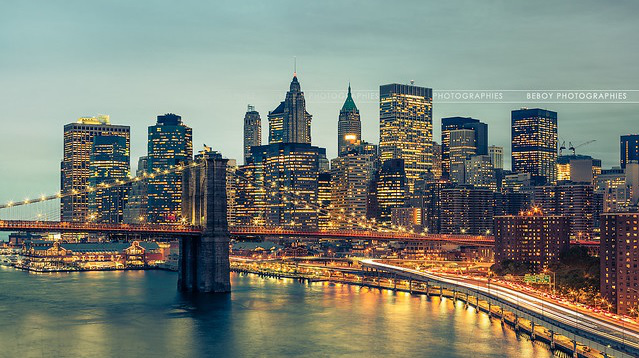

In [69]:
image

#### Visualizando a imagem no Sistema Operacional

In [70]:
image.show()

#### Exibir propriedades da imagem

##### imprimindo o formato da imagem

In [71]:
print(image.format)

JPEG


##### imprimindo o canal do formato de pixels

In [72]:
print(image.mode)

RGB


##### imprimindo as dimensões da imagem em pixels

In [73]:
print(image.size)

(639, 358)


### Pixel e Estrutura de Dados de Imagens

**Pixel** é a menor unidade de informação que compoe uma imagem digital.

Em uma imagem RGB o pixel é representado por três números de **8 bits** associados com as cores **R,G e B** que correspondem as cores **Red (Vermelho)**, **Green (Verde)** e **Blue (Azul)** respectivamente.

Como são números de 8 bits a faixa de valores é de **0 até 255**.

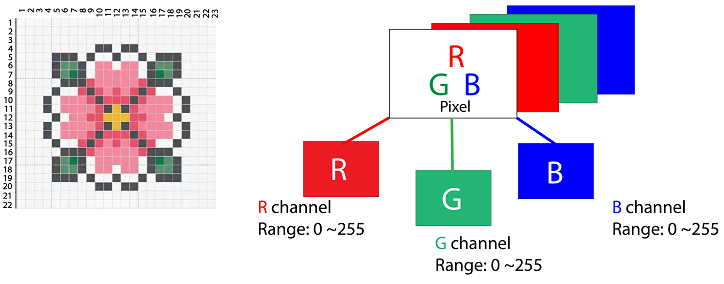

In [74]:
Image.open("imagens/pixel-rgb.png")

A cor do Pixel será gerada a partir da combinação de cada um dos canais.

Se a combinação de valores for 255 a cor do pixel será **branco**, se a combinação for 0, a cor do Pixel será **preto**.

![football](imagens/rgb_gif.gif "rgb")

#### Convertendo Imagens para arrays Numpy

##### importando as bibliotecas para visualização das imagens

In [75]:
from matplotlib import image
from matplotlib import pyplot

##### carregando imagem como um array NumPy

In [76]:
data = image.imread("imagens/new-york.jpg")

##### imprimindo o conteúdo do array NumPy

In [77]:
print(data)

[[[148 188 188]
  [148 188 188]
  [148 188 188]
  ...
  [119 145 146]
  [119 145 146]
  [119 145 144]]

 [[149 189 189]
  [149 189 189]
  [149 189 189]
  ...
  [119 145 146]
  [119 145 146]
  [118 144 145]]

 [[150 190 190]
  [150 190 190]
  [150 190 190]
  ...
  [118 144 145]
  [118 144 145]
  [118 144 145]]

 ...

 [[132 137 105]
  [128 135 102]
  [124 131  98]
  ...
  [ 16  22  44]
  [ 15  27  49]
  [ 22  39  59]]

 [[129 134 102]
  [127 134 101]
  [123 130  99]
  ...
  [ 66  64  85]
  [ 51  53  76]
  [ 38  46  67]]

 [[124 129  97]
  [124 131  98]
  [125 132 101]
  ...
  [ 39  30  49]
  [ 46  41  64]
  [ 52  52  76]]]


##### imprimindo as propriedades do array de pixels

In [78]:
print(data.dtype)

uint8


In [79]:
print(data.shape)

(358, 639, 3)


In [80]:
print(data.max())

255


In [81]:
print(data.min())

0


##### exibindo o array de pixels como uma imagem

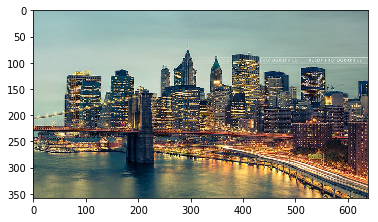

In [82]:
pyplot.imshow(data)

##### convertendo o array de pixels em um objeto Image Pillow

In [83]:
image2 = Image.fromarray(data)

##### verificando o tipo do objeto

In [84]:
type(image2)

PIL.Image.Image

##### convertendo um objeto do tipo imagem para um array numpy

In [85]:
from numpy import asarray

In [86]:
image = Image.open("imagens/new-york.jpg")

##### método asarray para realizar a conversão

In [87]:
data = asarray(image)

##### imprimindo os atributos do array

In [88]:
print(data.dtype)
print(data.shape)

uint8
(358, 639, 3)


#### Salvando imagens em disco

##### salvando a imagem no formato PNG

In [89]:
image.save("imagens/new-york.png",format="PNG")

##### salvando a imagem no formato GIF

In [90]:
image.save("imagens/new-york.gif",format="GIF")

##### carregando novamente a imagem e verificando o formato

In [92]:
image3 = Image.open("imagens/new-york.gif")

In [93]:
print(image3.format)

GIF


#### Convertendo imagens 

##### convertendo a imagem em escala de cinza

In [94]:
image_cinza = image.convert(mode="L")

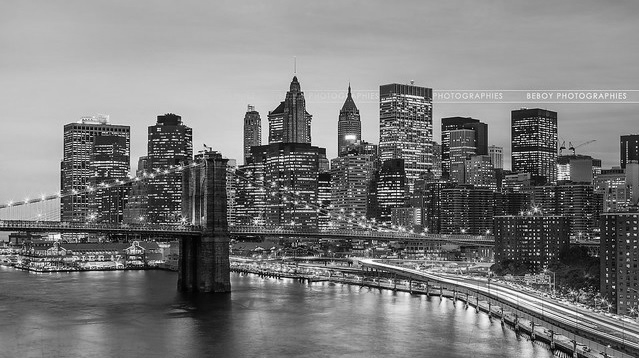

In [95]:
image_cinza

##### salvando a imagem em disco

In [96]:
image_cinza.save("imagens/new-york-cinza.jpg")

#### Resize Imagens

##### verificando o tamanho da imagem com o atributo size

In [98]:
print(image.size)

(639, 358)


##### gerando thumbnail de tamanho 100x100

In [99]:
image.thumbnail((100,100))

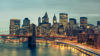

In [100]:
image

##### verificando as novas dimensões

In [101]:
print(image.size)

(100, 56)


##### carregando novamente a imagem

In [102]:
image = Image.open("imagens/new-york.jpg")

##### resize a imagem ignorando o aspect ratio

In [104]:
image_resize = image.resize((200,200))

##### verificando as novas dimensões

In [105]:
print(image_resize.size)

(200, 200)


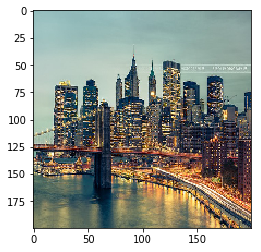

In [106]:
pyplot.imshow(image_resize)

#### Invertendo Imagens (Flip)

##### Inversão horizontal

In [107]:
horizontal_image = image.transpose(Image.FLIP_LEFT_RIGHT)

##### Visualizando a imagem

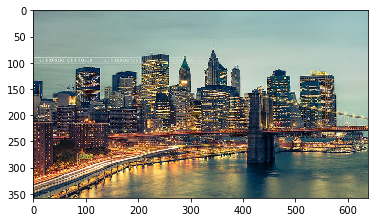

In [108]:
pyplot.imshow(horizontal_image)

##### Inversão vertical

In [110]:
vertical_image = image.transpose(Image.FLIP_TOP_BOTTOM)

##### Visualizando a imagem

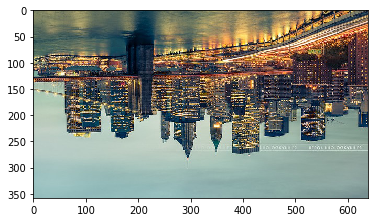

In [111]:
pyplot.imshow(vertical_image)

#### Girar Imagens (Rotate)

##### carregando novamente a imagem

In [112]:
image = Image.open("imagens/new-york.jpg")

##### rotacionando a imagem em 45 graus

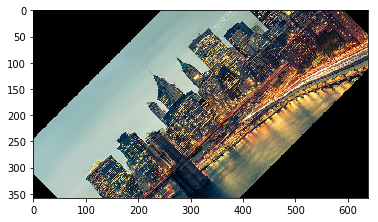

In [113]:
pyplot.imshow(image.rotate(45))

##### rotacionando a imagem em 90 graus

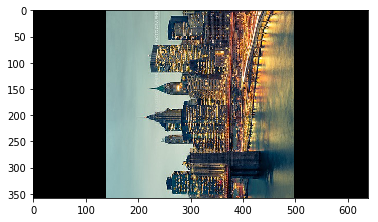

In [114]:
pyplot.imshow(image.rotate(90))

#### Cortar Imagens (Crop)

##### exibindo a imagem original

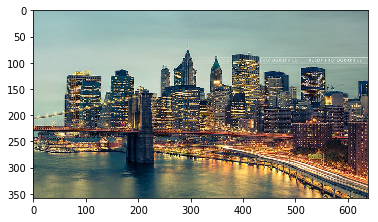

In [115]:
pyplot.imshow(image)

##### exibindo o corte a partir das coordenadas especificadas - left, upper, right, and lower

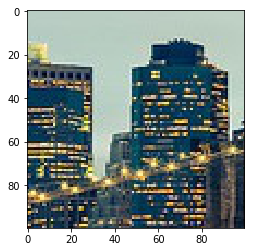

In [116]:
pyplot.imshow(image.crop((100,100,200,200)))

#### Técnicas de pré-processamento aplicado a imagens

##### normalizando valores de pixels

In [117]:
image = Image.open("imagens/new-york.jpg")

##### convertendo a imagem em um array

In [119]:
pixels = asarray(image)

##### verificando a faixa de valores entre 0 e 255

In [120]:
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: uint8
Min: 0.000, Max: 255.000


##### converte os valores inteiros em float para realizar a operação

In [121]:
pixels = pixels.astype('float32')

##### normaliza a faixa de valores

In [122]:
pixels /= pixels.max()

##### verificando a faixa de valores normalizada

In [123]:
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: float32
Min: 0.000, Max: 1.000
